In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabula import read_pdf

In [2]:
data2022_1 = read_pdf("Citaciones_inscripcion_pregrado_2022_1S_compressed.pdf", pages="all")

# es una lista de dataframes, en la que cada posicion es una pagina del pdf

In [3]:
# arreglar nombres de columnas
data2022_1[0].columns = ["DOCUMENTO", "GRUPO", "CONCEPTO", "EV_DOCENTE", "PAPPI", "DIA", "FRANJA"]
data2022_1[0].drop(index=[0, 1], inplace=True)

for pagina in data2022_1[1:]:
    pagina.columns = ["DOCUMENTO", "GRUPO", "CONCEPTO", "EV_DOCENTE", "PAPPI", "DIA", "FRANJA"]

sem_2022_1 = pd.concat(data2022_1, ignore_index=True)

sem_2022_1["PAPPI"] = sem_2022_1["PAPPI"].apply(lambda pappi: pappi.replace(",", ".") if type(pappi) is str else pappi )
sem_2022_1["PAPPI"] = pd.to_numeric(sem_2022_1["PAPPI"])
# sem_2022_1.dropna(subset=["PAPPI"], inplace=True)

sem_2022_1.sample(10)

,DOCUMENTO,GRUPO,CONCEPTO,EV_DOCENTE,PAPPI,DIA,FRANJA
1580,1152465984,GRUPO 2,NaN,NO,3.8,28/02/22,08:00 a 08:30
12107,1152223069,GRUPO 3,NaN,NO,3.7,1/03/22,10:00 a 10:30
6141,1131519250,GRUPO 3,NaN,SI,4.0,28/02/22,13:30 a 14:00
894,1128277592,GRUPO 2,NaN,SI,4.1,28/02/22,07:30 a 08:00
4901,1007676162,GRUPO 3,NaN,SI,4.2,28/02/22,11:30 a 12:00
6408,1020491889,GRUPO 3,NaN,SI,4.0,28/02/22,14:00 a 14:30
562,1017257784,GRUPO 2,NaN,SI,4.4,28/02/22,07:00 a 07:30
11991,1001395776,GRUPO 3,NaN,NO,3.7,1/03/22,09:00 a 09:30
1548,1037632591,GRUPO 2,NaN,NO,3.9,28/02/22,08:00 a 08:30
12424,1001201707,GRUPO 3,NaN,NO,3.5,1/03/22,10:00 a 10:30


### preguntas a desarrollar
1. mirar la distribucion de los PAPPIS
2. comparar el PAPPI promedio general y entre los diferentes grupos de cada semestre
3. comparar el PAPPI promedio entre los que hicieron la evaluacion docente y los que no, general y dentro del mismo grupo de cada semestre
4. prueba de hipotesis de si los promedios de PAPPI de cada semestre son estadisticamente != <= >=

## 1. mirar la distribucion de los PAPPIS

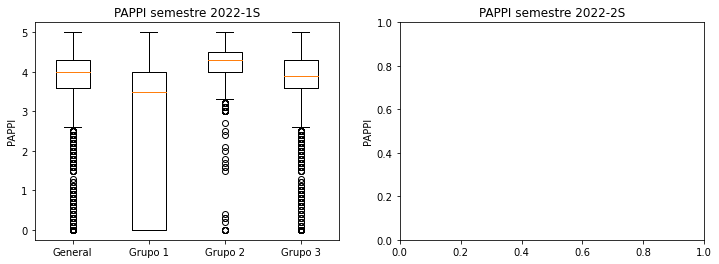

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, facecolor="w", figsize=(12,4))

boxes1 = [
    sem_2022_1["PAPPI"],
    sem_2022_1.query("GRUPO == 'GRUPO 1'")["PAPPI"],
    sem_2022_1.query("GRUPO == 'GRUPO 2'")["PAPPI"],
    sem_2022_1.query("GRUPO == 'GRUPO 3'")["PAPPI"],
]

ax1.boxplot(boxes1, labels=["General", "Grupo 1", "Grupo 2", "Grupo 3"])
ax1.set_ylabel("PAPPI")
ax1.set_title("PAPPI semestre 2022-1S")


ax2.set_ylabel("PAPPI")
ax2.set_title("PAPPI semestre 2022-2S")

plt.show()
# en general se ven valores extremos hacia los pappis bajos, destaca el grupo 1 el rango intercuartilico es enorme (creo que es porque los datos estan muy dispersos)

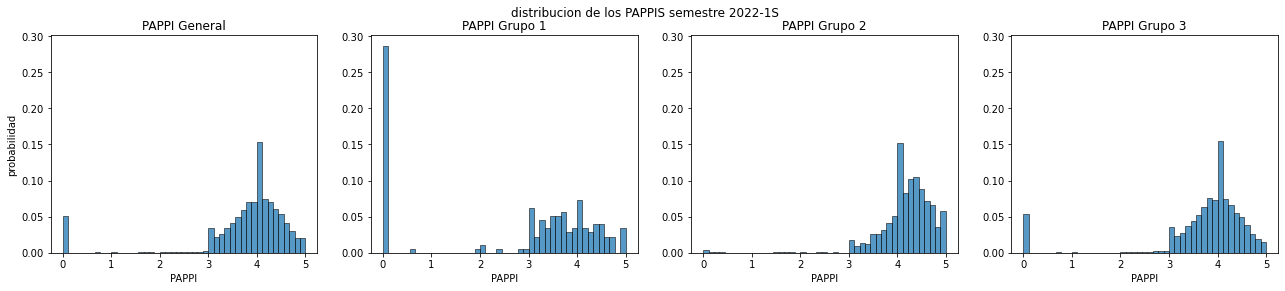

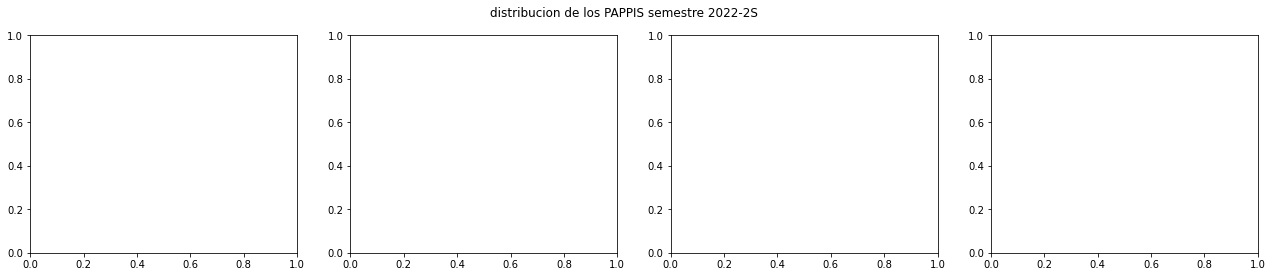

In [44]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, facecolor="w", figsize=(22,4), sharey=True)

fig.suptitle("distribucion de los PAPPIS semestre 2022-1S")

nbins = 45

# ax1.hist(sem_2022_1["PAPPI"], bins=50, density=True)
sns.histplot(x=sem_2022_1["PAPPI"], bins=nbins, stat="probability", ax=ax1)
ax1.set_title("PAPPI General")
ax1.set_ylabel("probabilidad")

# ax2.hist(sem_2022_1.query("GRUPO == 'GRUPO 1'")["PAPPI"], density=True)
sns.histplot(x=sem_2022_1.query("GRUPO == 'GRUPO 1'")["PAPPI"], bins=nbins, stat="probability", ax=ax2)
ax2.set_title("PAPPI Grupo 1")
ax2.set_ylabel("probabilidad")

# ax3.hist(sem_2022_1.query("GRUPO == 'GRUPO 2'")["PAPPI"], density=True)
sns.histplot(x=sem_2022_1.query("GRUPO == 'GRUPO 2'")["PAPPI"], bins=nbins, stat="probability", ax=ax3)
ax3.set_title("PAPPI Grupo 2")
ax3.set_ylabel("probabilidad")

# ax4.hist(sem_2022_1.query("GRUPO == 'GRUPO 3'")["PAPPI"], density=True)
sns.histplot(x=sem_2022_1.query("GRUPO == 'GRUPO 3'")["PAPPI"], bins=nbins, stat="probability", ax=ax4)
ax4.set_title("PAPPI Grupo 3")
ax4.set_ylabel("probabilidad")

ax2.yaxis.set_tick_params(labelleft=True)
ax3.yaxis.set_tick_params(labelleft=True)
ax4.yaxis.set_tick_params(labelleft=True)

# semestre 2022-2S
fig2, (axi1, axi2, axi3, axi4) = plt.subplots(1, 4, facecolor="w", figsize=(22,4), sharey=True)

fig2.suptitle("distribucion de los PAPPIS semestre 2022-2S")

axi2.yaxis.set_tick_params(labelleft=True)
axi3.yaxis.set_tick_params(labelleft=True)
axi4.yaxis.set_tick_params(labelleft=True)

plt.show()
# en el 2022-1S los pappis suelen estar entre 3 y 5 y tambien hay una acolumacion de pappis en 0 especialmente en el grupo 1 en proporcion a la cantidad de personas que estan en ese grupo
# la distribucion de los pappis general y del grupo 3 son muy similares, seguramente debido a que la inmensa mayoria de estudiantes estan en el grupo 3

## 2. comparar el PAPPI promedio entre los diferentes grupos

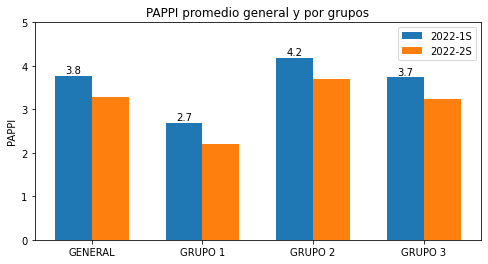

In [6]:
PAPPIS = sem_2022_1.groupby("GRUPO", as_index=False)["PAPPI"].mean()
PAPPIS = pd.concat([pd.DataFrame({"GRUPO": ["GENERAL"], "PAPPI": sem_2022_1["PAPPI"].mean()}), PAPPIS])


plt.figure(facecolor="w", figsize=(8,4))

bars1 = plt.bar([1, 4, 7, 10], PAPPIS["PAPPI"], label="2022-1S", width=1)
bars2 = plt.bar([2, 5, 8, 11], PAPPIS["PAPPI"]-0.5, label="2022-2S", width=1) # cambiar con los datos del 2022-2S
plt.title("PAPPI promedio general y por grupos")
plt.ylim([0,5])
plt.ylabel("PAPPI")
plt.bar_label(bars1, labels=np.round(PAPPIS["PAPPI"],1))
plt.legend()

plt.gca().set_xticks([1.5, 4.5, 7.5, 10.5])
plt.gca().set_xticklabels(labels=PAPPIS["GRUPO"])

plt.show()

## 3. comparar el PAPPI promedio entre los que hicieron la evaluacion docente y los que no, general y dentro del mismo grupo

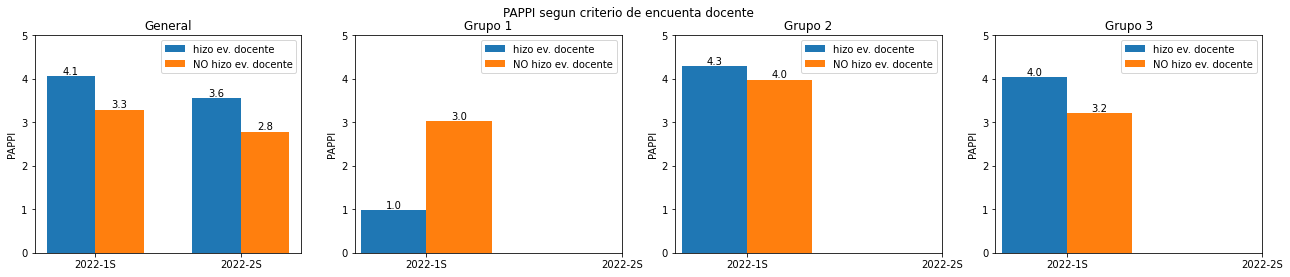

In [7]:
general2022_1 = [
    sem_2022_1.query("EV_DOCENTE == 'SI'")["PAPPI"].mean(),
    sem_2022_1.query("EV_DOCENTE == 'NO'")["PAPPI"].mean()
]

grupos2022_1 = sem_2022_1.groupby(["GRUPO", "EV_DOCENTE"])["PAPPI"].mean()

fig, axes = plt.subplots(1,4, facecolor="w", figsize=(22,4))

fig.suptitle("PAPPI segun criterio de encuenta docente")

# cambiar datos del 2022-2S
bar_SI = axes[0].bar([1, 4], [general2022_1[0], general2022_1[0]-0.5], label="hizo ev. docente", width=1)
bar_NO = axes[0].bar([2, 5], [general2022_1[1], general2022_1[1]-0.5], label="NO hizo ev. docente", width=1)
axes[0].bar_label(bar_SI, np.round([ general2022_1[0], general2022_1[0]-0.5 ], 1))
axes[0].bar_label(bar_NO, np.round([ general2022_1[1], general2022_1[1]-0.5 ], 1))
axes[0].set_title("General")

for i in range(1, 3+1):
    bar_SI = axes[i].bar([1], [grupos2022_1[(f"GRUPO {i}", "SI")]], label="hizo ev. docente", width=1)
    bar_NO = axes[i].bar([2], [grupos2022_1[(f"GRUPO {i}", "NO")]], label="NO hizo ev. docente", width=1)
    axes[i].bar_label(bar_SI, np.round( [grupos2022_1[(f"GRUPO {i}", "SI")]] , 1))
    axes[i].bar_label(bar_NO, np.round( [grupos2022_1[(f"GRUPO {i}", "NO")]] , 1))
    axes[i].set_title(f"Grupo {i}")


for ax in axes:
    ax.set_ylim([0,5])
    ax.set_ylabel("PAPPI")
    ax.legend()

    ax.set_xticks([1.5, 4.5])
    ax.set_xticklabels(["2022-1S", "2022-2S"])

plt.show()
# en general se ve que los que hacen la evaluacion docente en promedio tienen mejor pappi (al menos en el 2022-1s) excepto en el grupo 1,
# en el cual hay una gran cantidad de pappis en 0 lo cual afecta el promedio 